# ML Pipeline

As Data Scientist, we just have to Machine Learning models. We sit down, think about a problem in the world, how to solve it using Machine Learning or any kind of Artificial Intelligence and then just do it.  

Obviusly no one belived what I just said. We now that the data science world is about data, and most of our time will be dedicated to clean and treat data. The models are just the last part. That is why we have to design reusable ML pipelines, which ensures that the data will be treated always in the same manner and will produce the same result. 

![Anaconda_1.png](Anaconda_1.png)

In this notebook we are going to take a look at a ML Pipeline, but mostly at the data cleaning and preprocessing part.

![Data Centric AI](data-centric-ai.png)

### Now, our dataset! Today will be all about penguins!

![](https://camo.githubusercontent.com/1d187452ac3929cfde8f5760b79f37cc117c1a332227d37a8c50db50d3db632a/68747470733a2f2f616c6c69736f6e686f7273742e6769746875622e696f2f70616c6d657270656e6775696e732f7265666572656e63652f666967757265732f6c7465725f70656e6775696e732e706e67)

In [170]:
%pip install palmerpenguins

Note: you may need to restart the kernel to use updated packages.


In [171]:
import pandas as pd
import seaborn as sns 
from palmerpenguins import load_penguins_raw,load_penguins
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
sns.set_style('whitegrid')

In [172]:
penguins_raw = load_penguins_raw()
penguins_raw.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


## A little bit of Data Exploration

In [173]:
penguins_raw.tail()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
339,PAL0910,64,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N98A2,Yes,2009-11-19,55.8,19.8,207.0,4000.0,MALE,9.70465,-24.53494,NaN
340,PAL0910,65,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A1,No,2009-11-21,43.5,18.1,202.0,3400.0,FEMALE,9.37608,-24.40753,Nest never observed with full clutch.
341,PAL0910,66,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A2,No,2009-11-21,49.6,18.2,193.0,3775.0,MALE,9.46180,-24.70615,Nest never observed with full clutch.
342,PAL0910,67,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N100A1,Yes,2009-11-21,50.8,19.0,210.0,4100.0,MALE,9.98044,-24.68741,NaN
343,PAL0910,68,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N100A2,Yes,2009-11-21,50.2,18.7,198.0,3775.0,FEMALE,9.39305,-24.25255,NaN


We can begin with some data exploration, to check what kind of information we have, the types, the missing values, what classes do we have, etc.

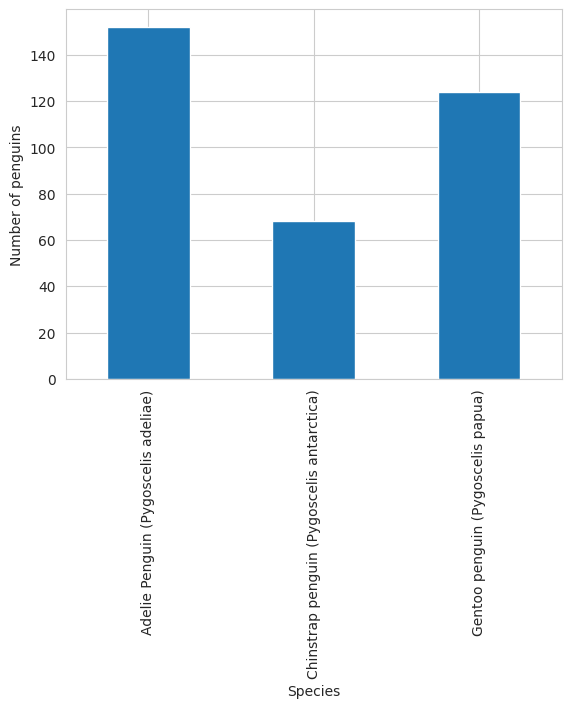

In [174]:
#TODO Check how many penguins do we have per species
penguins_per_species = penguins_raw.groupby('Species').size()

penguins_per_species.plot(kind='bar')
plt.xlabel('Species')
plt.ylabel('Number of penguins')
plt.show()


In [175]:
#TODO do all penguins belonging to the same species come from the same island ?
counts = penguins_raw.groupby(['Species'])['Island'].nunique()

# check if all species have only one unique island associated with them
if (counts == 1).all():
    print("All penguins from the same species come from the same island")
else:
    print("Not all penguins from the same species come from the same island")


Not all penguins from the same species come from the same island


In [176]:
#TODO What kind of data do we have in the dataset?
penguins_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  333 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [177]:
#TODO What kind of projects can be done with this dataset?

Classification model, Cluster Analysis, Data visualization. 

## Data Cleaning

In [178]:
# Check which attributes have missing values 
missing_counts = penguins_raw.isnull().sum()

print(missing_counts)

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     11
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               290
dtype: int64


There are multiple ways for dealing with missing values.
- Drop the rows that contain missing values
- Imputation: Filling in the missing values
- Model-based procedures
- Weighting

Droping the rows that contain missing values is ok, if the data that is missing is completly at random and there are not that many missing rows. But when data is not missing at random and we drop those rows, we biased the dataset, thus, the results.  
Imputation usually uses some statistical method, like the mean for numerical columns or the mode for catogorical columns. This will reduce the variability of the attribute.   
Using models and predictions for filling those values may work poorly if the data must be extrapolated.  
Weighting refers to fill with a value, that takes into account the group and the sample distribution. We take into account that our dataset has more rows from the group X than the group Y, it is unbalanced. So we weight the points, so we have a better data point, according to the group.

One key aspect is to be careful, so that our results are not just artifacts caused by our imputation. 

Can you name any case where the missing values are useful?

If we are looking to clean the data, we have to check both rows and columns. The order depends on the dataset and the context, but we usually drop first the columns that are not relevant to our analysis, and then drop the rows that contain missing values. The reasoning is that if we do that in the other way around, we might drop missing rows that do not contain information in an attribute that does not matter, then we would lose information.

One way we can tell that one column does not add information is when the whole column just have a constant value, which does not add anything for predictions. Another one is they are identifiers, each value is different, but they do not tell us anything or do no have any pattern. 

In [179]:
missing_values_except_comments = penguins_raw[penguins_raw.isna().any(axis=1) & ~penguins_raw['Comments'].isna()]
(missing_values_except_comments)


,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
8,PAL0708,9,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N5A1,Yes,2007-11-09,34.1,18.1,193.0,3475.0,NaN,NaN,NaN,No blood sample obtained.
9,PAL0708,10,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N5A2,Yes,2007-11-09,42.0,20.2,190.0,4250.0,NaN,9.13362,-25.09368,No blood sample obtained for sexing.
10,PAL0708,11,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N6A1,Yes,2007-11-09,37.8,17.1,186.0,3300.0,NaN,8.63243,-25.21315,No blood sample obtained for sexing.
11,PAL0708,12,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N6A2,Yes,2007-11-09,37.8,17.3,180.0,3700.0,NaN,NaN,NaN,No blood sample obtained.
12,PAL0708,13,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N7A1,Yes,2007-11-15,41.1,17.6,182.0,3200.0,FEMALE,NaN,NaN,Not enough blood for isotopes.
13,PAL0708,14,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N7A2,Yes,2007-11-15,38.6,21.2,191.0,3800.0,MALE,NaN,NaN,Not enough blood for isotopes.
15,PAL0708,16,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N8A2,Yes,2007-11-16,36.6,17.8,185.0,3700.0,FEMALE,NaN,NaN,Not enough blood for isotopes.
39,PAL0708,40,Adelie Penguin (Pygoscelis adeliae),Anvers,Dream,"Adult, 1 Egg Stage",N25A2,No,2007-11-13,39.8,19.1,184.0,4650.0,MALE,NaN,NaN,Nest never observed with full clutch. Not enou...


I determinate that most if not all of the rows that have NaN exist because there wasn't enough blood to analyse or because sexing primers did not amplify. This leads me to believe that this is random and rows can be saftly discarded. 

In [180]:

# Check the rows with missing values

penguins_clean: pd.DataFrame = penguins_raw.dropna(subset=[col for col in penguins_raw.columns if col != 'comments'])
penguins_clean = penguins_clean.fillna("No Comments")
# Deal with the missing data. Check how many records do you have that are missing some information, and select a strategy.
missing_values = penguins_clean[penguins_raw.isna().any(axis=1) ]
# Check again that there are no missing values in the dataset.
missing_values

/tmp/ipykernel_369/4123043119.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  missing_values = penguins_clean[penguins_raw.isna().any(axis=1) ]


,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments


In [181]:
penguins_clean.head(3)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
6,PAL0708,7,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A1,No,2007-11-15,38.9,17.8,181.0,3625.0,FEMALE,9.18718,-25.21799,Nest never observed with full clutch.
7,PAL0708,8,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A2,No,2007-11-15,39.2,19.6,195.0,4675.0,MALE,9.46060,-24.89958,Nest never observed with full clutch.
28,PAL0708,29,Adelie Penguin (Pygoscelis adeliae),Anvers,Biscoe,"Adult, 1 Egg Stage",N18A1,No,2007-11-10,37.9,18.6,172.0,3150.0,FEMALE,8.38404,-25.19837,Nest never observed with full clutch.


### Categorical to numeric

Most models work with quantitative data. They cannot accept a category or a label for the training. We can do two things, transform the categories with one hot enconding or to a representation, giving a number to each category. The second option is not advisable, since the assigned value given to each category is just a representation, but in numbers, it can imply order or magnitude. For example, if I say that "dog" is 5 and "cat" is 0, does that mean that dog is better than cat? It has a higher value. What if our model learns that? On the other hand, if we use "dog" as 1 and "cat" as 0, but as the labels of the predicted variable, then we are good. 
One-hot-encoding will create n columns, one for each category, and it will have the value of 1 or 0 if the row has that attribute or not. As the model creates n columns, we can discard one of them, since it is the complement of the others and therefore, does not add any new information.

In [182]:
#TODO Get just the year from the date 
penguins_clean["Date Egg"] = pd.to_datetime(penguins_clean["Date Egg"])
penguins_clean["Date Egg"] = penguins_clean["Date Egg"].dt.year
penguins_clean.head(10)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
6,PAL0708,7,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A1,No,2007,38.9,17.8,181.0,3625.0,FEMALE,9.18718,-25.21799,Nest never observed with full clutch.
7,PAL0708,8,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A2,No,2007,39.2,19.6,195.0,4675.0,MALE,9.46060,-24.89958,Nest never observed with full clutch.
28,PAL0708,29,Adelie Penguin (Pygoscelis adeliae),Anvers,Biscoe,"Adult, 1 Egg Stage",N18A1,No,2007,37.9,18.6,172.0,3150.0,FEMALE,8.38404,-25.19837,Nest never observed with full clutch.
29,PAL0708,30,Adelie Penguin (Pygoscelis adeliae),Anvers,Biscoe,"Adult, 1 Egg Stage",N18A2,No,2007,40.5,18.9,180.0,3950.0,MALE,8.90027,-25.11609,Nest never observed with full clutch.
38,PAL0708,39,Adelie Penguin (Pygoscelis adeliae),Anvers,Dream,"Adult, 1 Egg Stage",N25A1,No,2007,37.6,19.3,181.0,3300.0,FEMALE,9.41131,-25.04169,Nest never observed with full clutch.
68,PAL0809,69,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N32A1,No,2008,35.9,16.6,190.0,3050.0,FEMALE,8.47781,-26.07821,Nest never observed with full clutch.
69,PAL0809,70,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N32A2,No,2008,41.8,19.4,198.0,4450.0,MALE,8.86853,-26.06209,Nest never observed with full clutch.
120,PAL0910,121,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N66A1,No,2009,36.2,17.2,187.0,3150.0,FEMALE,9.04296,-26.19444,Nest never observed with full clutch.
121,PAL0910,122,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N66A2,No,2009,37.7,19.8,198.0,3500.0,MALE,9.11066,-26.42563,Nest never observed with full clutch.
130,PAL0910,131,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N73A1,No,2009,38.5,17.9,190.0,3325.0,FEMALE,8.98460,-25.57956,Nest never observed with full clutch.


In [183]:
penguins_clean.head(3)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
6,PAL0708,7,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A1,No,2007,38.9,17.8,181.0,3625.0,FEMALE,9.18718,-25.21799,Nest never observed with full clutch.
7,PAL0708,8,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A2,No,2007,39.2,19.6,195.0,4675.0,MALE,9.46060,-24.89958,Nest never observed with full clutch.
28,PAL0708,29,Adelie Penguin (Pygoscelis adeliae),Anvers,Biscoe,"Adult, 1 Egg Stage",N18A1,No,2007,37.9,18.6,172.0,3150.0,FEMALE,8.38404,-25.19837,Nest never observed with full clutch.


In [184]:
#TODO We have 17 columns on the data set. Eliminate the columns that do not add any relevant information. 
non_relevant_columns = ["Comments", "Individual ID", "Sample Number"]
penguins_clean = penguins_clean.drop(non_relevant_columns,axis=1, inplace=False)


In [185]:
penguins_clean.head(3)

,studyName,Species,Region,Island,Stage,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
6,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",No,2007,38.9,17.8,181.0,3625.0,FEMALE,9.18718,-25.21799
7,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",No,2007,39.2,19.6,195.0,4675.0,MALE,9.46060,-24.89958
28,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Biscoe,"Adult, 1 Egg Stage",No,2007,37.9,18.6,172.0,3150.0,FEMALE,8.38404,-25.19837


In [190]:
#Use one-hot-encoding for the sex column. How many columns do you need?
#Use pandas .get_dummies()

dummies = pd.get_dummies(penguins_clean['Sex'])

df = pd.concat([penguins_clean, dummies], axis=1)

df = df.drop('Sex', axis=1)
df = df.drop("MALE", axis=1)

(df)


,studyName,Species,Region,Island,Stage,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),FEMALE
6,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",No,2007,38.9,17.8,181.0,3625.0,9.18718,-25.21799,1
7,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",No,2007,39.2,19.6,195.0,4675.0,9.46060,-24.89958,0
28,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Biscoe,"Adult, 1 Egg Stage",No,2007,37.9,18.6,172.0,3150.0,8.38404,-25.19837,1
29,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Biscoe,"Adult, 1 Egg Stage",No,2007,40.5,18.9,180.0,3950.0,8.90027,-25.11609,0
38,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Dream,"Adult, 1 Egg Stage",No,2007,37.6,19.3,181.0,3300.0,9.41131,-25.04169,1
68,PAL0809,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",No,2008,35.9,16.6,190.0,3050.0,8.47781,-26.07821,1
69,PAL0809,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",No,2008,41.8,19.4,198.0,4450.0,8.86853,-26.06209,0
120,PAL0910,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",No,2009,36.2,17.2,187.0,3150.0,9.04296,-26.19444,1
121,PAL0910,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",No,2009,37.7,19.8,198.0,3500.0,9.11066,-26.42563,0
130,PAL0910,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",No,2009,38.5,17.9,190.0,3325.0,8.98460,-25.57956,1


## Data Exploration

Great! We have our dataset ready. We already eliminate non-informative columns and fill the missing values. Now we can explore more about the data. One important way of exploring it is through visualizations.


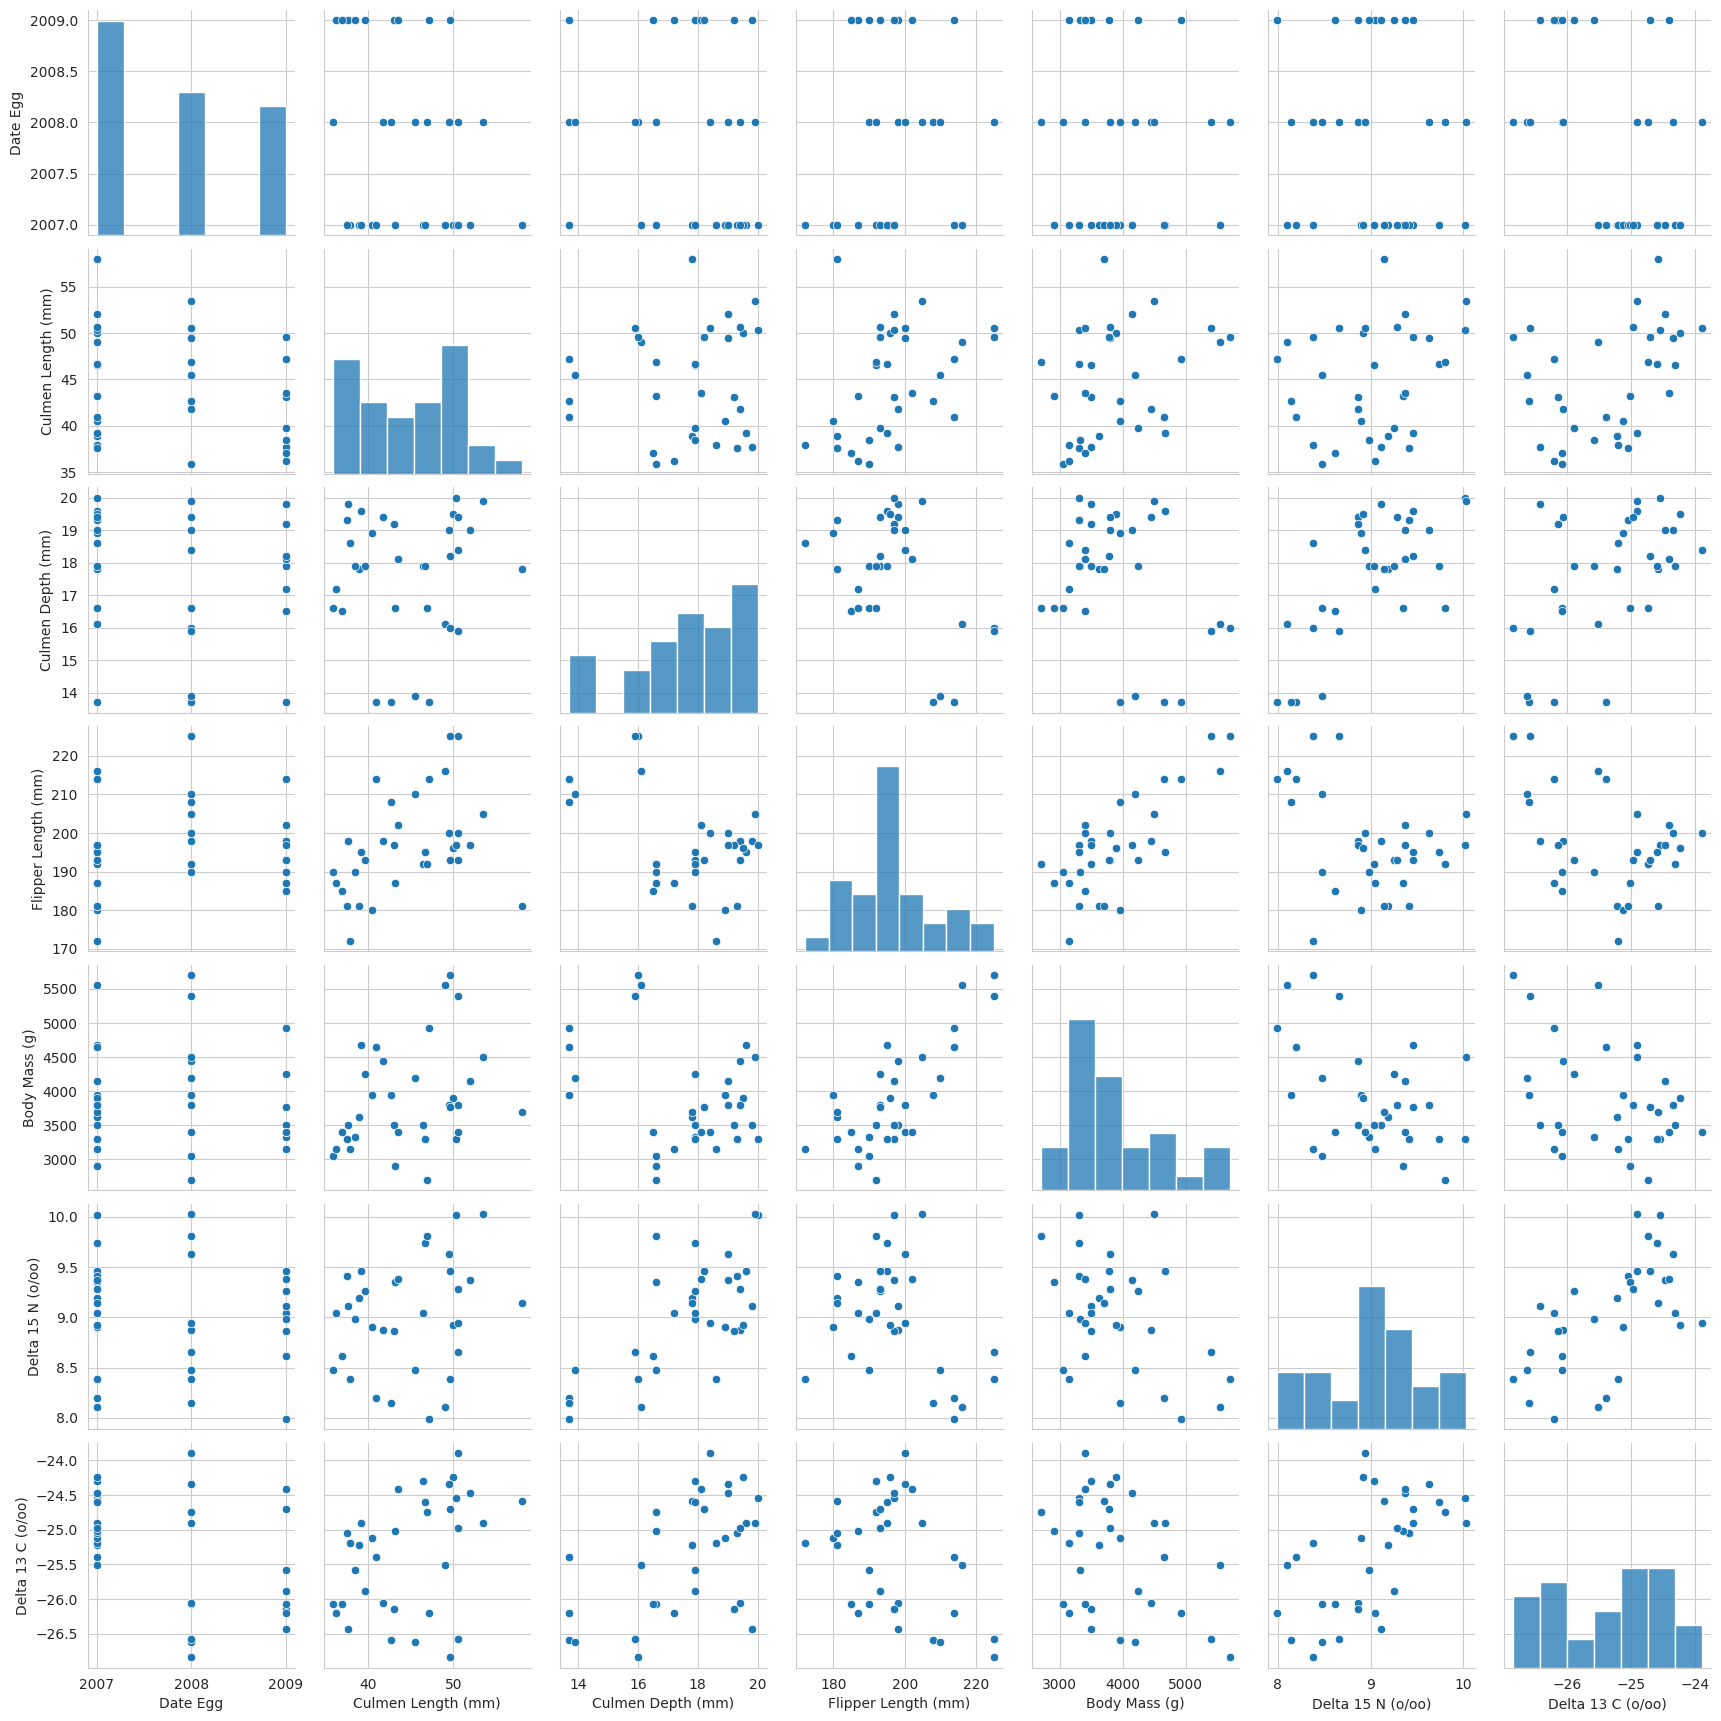

In [ ]:
#TODO plot some variables or attributes agains each other, what can you tell from that? You can use seaborns pairplot
sns.pairplot(penguins_clean)

## PCA

Principal Component Analysis is a technique for dimensionality reduction. It is useful for reducing the size of a dataset. It is important since we want to optimize time and processing, but without the loss of relevant information.  
It will compute a number of new components, that explain the variability of the dataset. It is worth mentioning that the resulting components are not columns from the previous dataset, and we do not know which one they represent.  
It is unsupervised, which means that PCA does not need the target variable. It will also help us visualize data, given by our inability to comprehend high dimensional spaces. Then, we can reduce the dimensions to 2 or 3, which we can plot and understand. This last part usually only works for visualization, having just two components from a high dimensional dataset might not explain the variance.

In the previous plot, we had 4 or 5 plots, depending on your column selection. How many plots are comparing two attributes? Now imagine we have 10, 20 attributes, it is no longer feasable. The, we can do PCA to have a lower dimensional data, that still explains the original one.  

PCA tries to find the components were the observations vary the most. Each component will be linear combination of the features, with some weights learned, pretty much like a linear regression. The weights must add to 1, so that we can limit their scale. At the end, it is an optimization problem of finding those weights for each component. As all of them have the same optimization problem, all of them would result in the same vector or component. We can solve this by adding another constraint to the model, we want the components to be uncorrelated. 

There is just one problem. As many other unsupervised methods, the PCA needs a K hyperparameter. It tells the model how many components create. With a low K, we might end-up missing a lot of information, and with a large k, close to n (number of attributes), then we are not reducing enough the dimensionality. So, how can we determine that K? We can plot the explained variance for each possible k between 1 and n, and select the best k. Again, selecting the best k depends on the context. Usually we select the k were 99% percent of the variance is explained, without being to large. 

So we will have two metrics. The Proportion of Variance Explained (PVE) and the Cumulative Variance Explained.

In [ ]:
from sklearn.decomposition import PCA

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
penguins_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  333 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [ ]:
penguins_num = penguins_raw.select_dtypes(['float64'])

In [ ]:
penguins_raw['Species'].astype('category')

0            Adelie Penguin (Pygoscelis adeliae)
1            Adelie Penguin (Pygoscelis adeliae)
2            Adelie Penguin (Pygoscelis adeliae)
3            Adelie Penguin (Pygoscelis adeliae)
4            Adelie Penguin (Pygoscelis adeliae)
                         ...                    
339    Chinstrap penguin (Pygoscelis antarctica)
340    Chinstrap penguin (Pygoscelis antarctica)
341    Chinstrap penguin (Pygoscelis antarctica)
342    Chinstrap penguin (Pygoscelis antarctica)
343    Chinstrap penguin (Pygoscelis antarctica)
Name: Species, Length: 344, dtype: category
Categories (3, object): ['Adelie Penguin (Pygoscelis adeliae)', 'Chinstrap penguin (Pygoscelis antarctica)', 'Gentoo penguin (Pygoscelis papua)']

In [ ]:
colors = penguins_raw['Species'].astype('category').cat.codes.map({0:'orange',1:'violet',2:'blue'})

In [ ]:
colors

0      orange
1      orange
2      orange
3      orange
4      orange
        ...  
339    violet
340    violet
341    violet
342    violet
343    violet
Length: 344, dtype: object

In [ ]:
c = penguins_raw['Species'].astype('category').cat.codes
colors  = [f"C{i}" for i in np.arange(0, c.max()+1)]
cmap, norm = matplotlib.colors.from_levels_and_colors(np.arange(0, c.max()+2), colors)

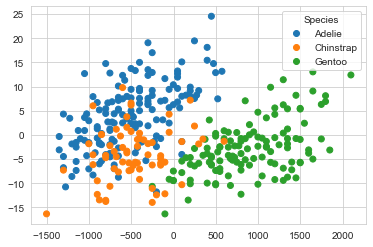

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(penguins_num)

sp_names =['Adelie','Chinstrap','Gentoo']
scatter = plt.scatter(X_pca[:,0],X_pca[:,1],c=c,cmap=cmap,norm=norm)

plt.legend(handles=scatter.legend_elements()[0], 
           labels=sp_names,
           title="Species")
plt.show()

Great! But let's plot the explained variance of the components, which is in which direction the components vary the most.

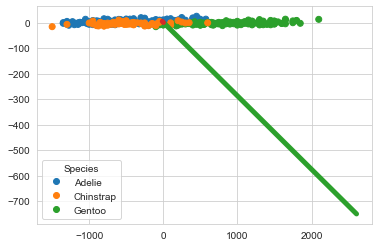

In [ ]:
scatter = plt.scatter(X_pca[:,0],X_pca[:,1],c=c,cmap=cmap,norm=norm)
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot(
        [0, comp[0]],
        [0, comp[1]],
        label=f"Component {i}",
        linewidth=5,
        color=f"C{i + 2}",
    )
plt.legend(handles=scatter.legend_elements()[0], 
           labels=sp_names,
           title="Species")
plt.show()

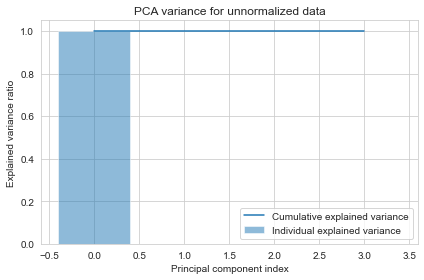

In [ ]:
pca = PCA()
#
# Determine transformed features
#
X_train_pca = pca.fit_transform(penguins_num)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title("PCA variance for unnormalized data")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

What just happened? With just one component we can explain all the variance in the dataset. Does that seems right?  
Here is the catch. PCA works with the variances, it looks for the direction of greater variance from the data. But when data is not scaled, just the attributes that have a greater unit of measure and higher values, will affect the variance. Attributes that have lower values, will not be taken into account. Therefore, we need to scale the data before applying PCA, where every attribute has 0 mean.

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [ ]:
scaler = StandardScaler()
penguins_scaled = scaler.fit_transform(penguins_num)

In [ ]:
penguins_scaled_dt = pd.DataFrame(penguins_scaled, columns=penguins_num.columns)

In [ ]:
penguins_scaled_dt['Species'] = penguins_raw['Species']

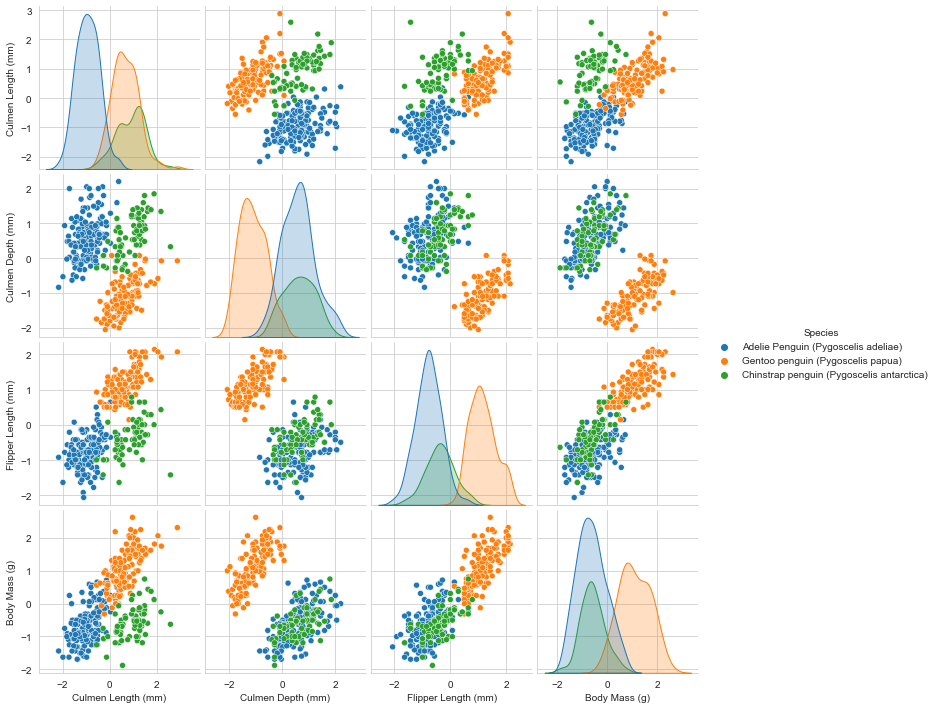

In [ ]:
sns.pairplot(penguins_scaled_dt,hue='Species')

In [ ]:
c = penguins_raw['Species'].astype('category').cat.codes
colors  = [f"C{i}" for i in np.arange(0, c.max()+1)]
cmap, norm = matplotlib.colors.from_levels_and_colors(np.arange(0, c.max()+2), colors)

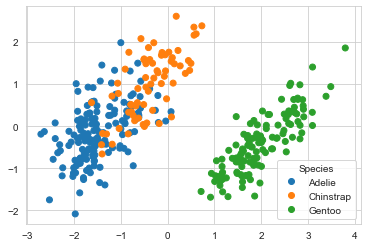

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(penguins_scaled)

sp_names =['Adelie','Chinstrap','Gentoo']
scatter = plt.scatter(X_pca[:,0],X_pca[:,1],c=c,cmap=cmap,norm=norm)
plt.legend(handles=scatter.legend_elements()[0], 
           labels=sp_names,
           title="Species")
plt.show()

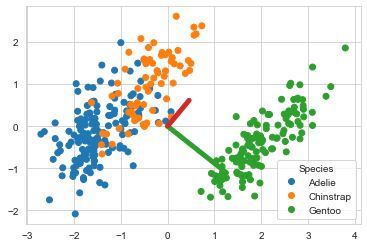

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(penguins_scaled)

sp_names =['Adelie','Chinstrap','Gentoo']
scatter = plt.scatter(X_pca[:,0],X_pca[:,1],c=c,cmap=cmap,norm=norm)
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot(
        [0, comp[0]],
        [0, comp[1]],
        label=f"Component {i}",
        linewidth=5,
        color=f"C{i + 2}",
    )
plt.legend(handles=scatter.legend_elements()[0], 
           labels=sp_names,
           title="Species")
plt.show()

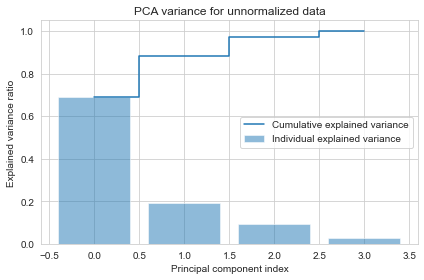

In [ ]:
pca = PCA()
#
# Determine transformed features
#
X_train_pca = pca.fit_transform(penguins_scaled)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title("PCA variance for unnormalized data")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Better right? If we do not scale the data, we might lose relevant information. With the scaled data, we see better the components after PCA, and we can see that there is a penguin species very distinctive to the other two. But more than that, we see the pattern or direction in which the data are varying the most.   

Same with the number of components. Before scaling the data, we saw that it required only one component to explain all the variance, this was not correct. Instead, we now see that we need three components to explain all the variance, basically one component less than the 4 numerical columns that we are evaluating.